In [1]:
%matplotlib inline

### Test glue_tree from Newick

Change Kernel to `glueviz-dev`.

In [13]:
from config import *

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [3]:
# parse the example Newick

test = read_newick('tmp2.nwk')

for ID in test.component_ids():
    
    print(ID, ':', test[ID])

Pixel Axis 0 [x] : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
World 0 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
parent : [-1  0  0  0  3  3  0  6  6  8  8  0  0 12 12]
names : ['' 'A' 'B' '' 'C' 'D' '' 'E' '' 'F' 'G' 'H' '' 'I' 'J']
size : [0.   0.1  0.2  0.5  0.3  0.4  0.35 0.25 0.4  0.1  0.15 0.25 0.3  0.1
 0.2 ]


In [4]:
# identify the leafness of each structures

leafness = []

for pix in range(len(test['parent'])):
    
    if pix != (len(test['parent'])-1):
        leafness.append('leaf' if (test['parent'][pix] >= test['parent'][pix+1]) else 'branch')
    else:
        leafness.append('leaf')

In [5]:
# identify the direct children of each branch

children = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        child = idx[(test['parent'] == idx[pix])]
        
    else:
        
        child = np.array([])
        
    children.append(child)

In [20]:
set(test['parent'])

{-1, 0, 3, 6, 8, 12}

In [21]:
test['parent']

array([-1,  0,  0,  0,  3,  3,  0,  6,  6,  8,  8,  0,  0, 12, 12])

In [19]:
len(set(test['parent']))

6

In [6]:
# calculate x-positions following astrodendro

x_pos = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

## leaves
_cached_pos = 1.
for pix in idx[(np.array(leafness) == 'leaf')]:
    
    x_pos[pix] = _cached_pos
    _cached_pos += 1.
    
    
#nlevels = 5
nlevels = len(set(test['parent']))  ### optimize this.
for level in np.array(range(nlevels)):
    for pix in idx[(np.array(leafness) == 'branch')]:
        
        if x_pos[pix] == 0.:
            
            if np.all(x_pos[children[pix]] != 0.):
                
                x_pos[pix] = np.mean(x_pos[children[pix]])
                
            else:
                
                continue
                
        else:
            
            continue
    

In [7]:
# heights

heights = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    heights[idx[(test['parent'] == pix)]] += (test['size'][pix] + heights[pix])
    
heights = heights + test['size']

In [8]:
# vertices for vertical lines

verts = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if test['parent'][pix] == -1:
        
        vert = np.array([[x_pos[pix], 0.],
                         [x_pos[pix], heights[pix]]])
    
    else:
        
        vert = np.array([[x_pos[pix], heights[test['parent'][pix]]],
                         [x_pos[pix], heights[pix]]])
    
    verts.append(vert)
    
    
# vertices for horizontal lines
verts_horiz = []

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        vert = np.array([[x_pos[idx[(test['parent'] == pix)][0]], heights[pix]],
                         [x_pos[idx[(test['parent'] == pix)][-1]], heights[pix]]])
        
    else:
        
        continue
        
    verts_horiz.append(vert)

In [76]:
lc = LineCollection(verts,
                    linewidths = 5.,
                    colors = 'k',
                    linestyle = 'solid')
lc_horiz = LineCollection(verts_horiz,
                    linewidths = 5.,
                    colors = 'k',
                    linestyle = 'solid')

(-0.2, 1.0)

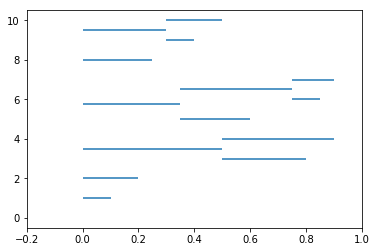

In [79]:
fig = plt.figure()
ax = fig.gca()


#artist = ax.add_collection(lc)
ax.add_collection(LineCollection(verts_rot))
#artist.set_data(lc)
#ax.add_collection(lc_horiz)

ax.set_ylim(-.5, 10.5)

ax.set_xlim(-.2, 1.)

In [78]:
verts_rot = []

for vert in verts:
    
    _cache = np.zeros(vert.shape)
    
    _cache[:, 0] = vert[:, 1]
    _cache[:, 1] = vert[:, 0]
    
    verts_rot.append(_cache)

In [69]:
verts_rot

[array([[0.        , 4.95833333],
        [0.        , 4.95833333]]), array([[0. , 1. ],
        [0.1, 1. ]]), array([[0. , 2. ],
        [0.2, 2. ]]), array([[0. , 3.5],
        [0.5, 3.5]]), array([[0.5, 3. ],
        [0.8, 3. ]]), array([[0.5, 4. ],
        [0.9, 4. ]]), array([[0.  , 5.75],
        [0.35, 5.75]]), array([[0.35, 5.  ],
        [0.6 , 5.  ]]), array([[0.35, 6.5 ],
        [0.75, 6.5 ]]), array([[0.75, 6.  ],
        [0.85, 6.  ]]), array([[0.75, 7.  ],
        [0.9 , 7.  ]]), array([[0.  , 8.  ],
        [0.25, 8.  ]]), array([[0. , 9.5],
        [0.3, 9.5]]), array([[0.3, 9. ],
        [0.4, 9. ]]), array([[ 0.3, 10. ],
        [ 0.5, 10. ]])]

In [67]:
verts

[array([[4.95833333, 0.        ],
        [4.95833333, 0.        ]]), array([[1. , 0. ],
        [1. , 0.1]]), array([[2. , 0. ],
        [2. , 0.2]]), array([[3.5, 0. ],
        [3.5, 0.5]]), array([[3. , 0.5],
        [3. , 0.8]]), array([[4. , 0.5],
        [4. , 0.9]]), array([[5.75, 0.  ],
        [5.75, 0.35]]), array([[5.  , 0.35],
        [5.  , 0.6 ]]), array([[6.5 , 0.35],
        [6.5 , 0.75]]), array([[6.  , 0.75],
        [6.  , 0.85]]), array([[7.  , 0.75],
        [7.  , 0.9 ]]), array([[8.  , 0.  ],
        [8.  , 0.25]]), array([[9.5, 0. ],
        [9.5, 0.3]]), array([[9. , 0.3],
        [9. , 0.4]]), array([[10. ,  0.3],
        [10. ,  0.5]])]

In [56]:
x, y = x_pos, heights

ids = np.arange(3)

blank = np.zeros(ids.size) * np.nan
x = np.column_stack([x[ids], x[ids + 1],
                     x[ids + 2], blank]).ravel()
y = np.column_stack([y[ids], y[ids + 1],
                     y[ids + 2], blank]).ravel()

In [59]:
lc.get_segments()

[array([[4.95833333, 0.        ],
        [4.95833333, 0.        ]]), array([[1. , 0. ],
        [1. , 0.1]]), array([[2. , 0. ],
        [2. , 0.2]]), array([[3.5, 0. ],
        [3.5, 0.5]]), array([[3. , 0.5],
        [3. , 0.8]]), array([[4. , 0.5],
        [4. , 0.9]]), array([[5.75, 0.  ],
        [5.75, 0.35]]), array([[5.  , 0.35],
        [5.  , 0.6 ]]), array([[6.5 , 0.35],
        [6.5 , 0.75]]), array([[6.  , 0.75],
        [6.  , 0.85]]), array([[7.  , 0.75],
        [7.  , 0.9 ]]), array([[8.  , 0.  ],
        [8.  , 0.25]]), array([[9.5, 0. ],
        [9.5, 0.3]]), array([[9. , 0.3],
        [9. , 0.4]]), array([[10. ,  0.3],
        [10. ,  0.5]])]

In [60]:
lc.set_segments([np.array([[0., 1.], [1., 2.]])])

In [61]:
lc.get_segments()

[array([[0., 1.],
        [1., 2.]])]

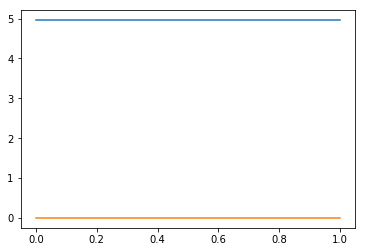

In [37]:
plt.plot(verts[0])

In [27]:
import pandas as pd

In [32]:
temp_dict = {'parent': test['parent'],
             'height': heights}

temp_table = pd.DataFrame(temp_dict)
temp_table.to_csv('data/parent_height.csv',
                  index = False)

In [31]:
!ls

README.md        config.pyc       dendro_plot.py   tmp2.nwk
__pycache__      data             test.ipynb       tree_js.html
config.py        dendro_layout.py tmp.nwk          viewer_test


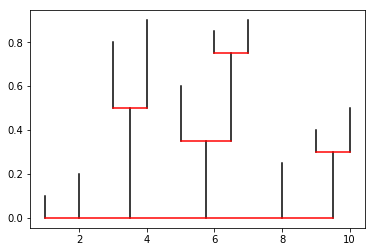

In [33]:
# test plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    ax.plot(verts[pix][:, 0],
            verts[pix][:, 1],
            color = 'k')
    
for pix in np.array(range(len(verts_horiz))):
    
    ax.plot(verts_horiz[pix][:, 0],
            verts_horiz[pix][:, 1],
            color = 'r')

______
### Test astrodendro

Change Kernel to the default.

In [1]:
import numpy as np

from astropy.io import fits
from astrodendro import Dendrogram
import matplotlib.pyplot as plt
#import matplotlib.patches as patches

In [2]:
!ls data

obsvL1689_AV.fits obsvL1689_AV.hdf5


In [3]:
data = fits.open('data/obsvL1689_AV.fits')
dendro = Dendrogram.load_from('data/obsvL1689_AV.hdf5')

p_dendro = dendro.plotter()
paths = p_dendro.get_lines().get_paths()

//anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
paths[0].vertices

array([[1.6484375 , 7.14289618],
       [1.6484375 , 7.95219183]])

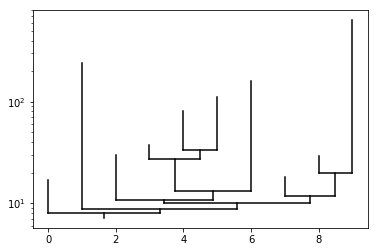

In [11]:
fig = plt.figure()
ax = fig.gca()

for pix in np.array(range(len(paths))):
    
    vert = paths[pix].vertices
    
    ax.plot(vert[:, 0],
            vert[:, 1],
            color = 'k')
    
    
ax.set_yscale('log')